# 任务2 数据清洗(2天)
每一步都要认真完成，附上代码，最终效果截图

## 缺失值分析及处理

* 缺失值出现的原因分析
* 采取合适的方式对缺失值进行填充

## 异常值分析及处理

* 根据测试集数据的分布处理训练集的数据分布

* 使用合适的方法找出异常值
* 对异常值进行处理

## 深度清洗

* 分析每一个communityName、city、region、plate的数据分布并对其进行数据清洗





## 简要分析
在任务一中，我们对于赛题、数据总体情况、缺失值、特征分布等信息做了简要的分析。在本次任务中就是基于任务一的分析做数据清理工作。  
在一些场景中，任务一和任务二合并起来会被称作EDA(Exploratory Data Analysis-探索性数据分析)。当然真正的EDA包含的内容远不止这两份参考示例所展示了，大家可以自行学习尝试。  
  



参考资料：   
[一文带你探索性数据分析(EDA)
](https://www.jianshu.com/p/9325c9f88ee6)

# 缺失值处理

In [2]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

# GBDT
from sklearn.ensemble import GradientBoostingRegressor
# XGBoost
import xgboost as xgb
# LightGBM
import lightgbm as lgb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import pickle
import multiprocessing
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,LinearRegression,LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

In [4]:
#载入数据
data_train = pd.read_csv('./data_source/train_data.csv')
data_train['Type'] = 'Train'
data_test = pd.read_csv('./data_source/test_a.csv')
data_test['Type'] = 'Test'
data_all = pd.concat([data_train, data_test], ignore_index=True)

,ID,Type,area,bankNum,buildYear,busStationNum,city,communityName,drugStoreNum,gymNum,...,totalWorkers,tradeLandArea,tradeLandNum,tradeMeanPrice,tradeMoney,tradeNewMeanPrice,tradeNewNum,tradeSecNum,tradeTime,uv
0,100309852,Train,68.06,16,1953,36,SH,XQ00051,12,15,...,28248,0.00,0,47974.22551,2000.0,104573.48460,25,111,2018/11/28,284.0
1,100307942,Train,125.55,16,2007,184,SH,XQ00130,27,5,...,14823,0.00,0,40706.66775,2000.0,33807.53497,2,2,2018/12/16,22.0
2,100307764,Train,132.00,37,暂无信息,60,SH,XQ00179,24,35,...,77645,0.00,0,34384.35089,16000.0,109734.16040,11,555,2018/12/22,20.0
3,100306518,Train,57.00,47,暂无信息,364,SH,XQ00313,83,30,...,8750,108037.80,1,20529.55050,1600.0,30587.07058,58,260,2018/12/21,279.0
4,100305262,Train,129.00,10,暂无信息,141,SH,XQ01257,21,5,...,800,0.00,0,24386.36577,2900.0,51127.32846,34,38,2018/11/18,480.0
5,100304268,Train,223.35,95,2003,276,SH,XQ00457,118,64,...,48204,0.00,0,41847.05870,14000.0,82388.42970,146,276,2018/11/14,1304.0
6,100304055,Train,78.94,47,2014,364,SH,XQ00246,83,30,...,8750,0.00,0,20106.77761,1000.0,29691.24733,46,216,2018/11/18,469.0
7,100295123,Train,76.00,86,1997,461,SH,XQ02331,106,36,...,28546,0.00,0,22759.44425,1800.0,35584.24959,389,481,2018/3/24,2942.0
8,100293141,Train,120.55,86,2007,461,SH,XQ02346,106,36,...,28546,0.00,0,22759.44425,1450.0,35584.24959,389,481,2018/3/19,2942.0
9,100293063,Train,83.00,86,1993,461,SH,XQ02310,106,36,...,28546,0.00,0,21067.22902,1700.0,33797.35915,119,331,2018/4/26,3035.0


## 主要思路分析
虽然这步骤是缺失值处理，但还会涉及到一些最最基础的数据处理。  
1. **缺失值处理**  
缺失值的处理手段大体可以分为：删除、填充、映射到高维(当做类别处理)。  
详细的请自行查找相关资料学习。  
根据任务一，直接找到的缺失值情况是pu和pv；但是，根据特征nunique分布的分析，可以发现rentType存在"--"的情况，这也算是一种缺失值。  
此外，诸如rentType的"未知方式"；houseToward的"暂无数据"等，本质上也算是一种缺失值，但是对于这些缺失方式，我们可以把它当做是特殊的一类处理，而不需要去主动修改或填充值。  
  
  将rentType的"--"转换成"未知方式"类别；  
  pv/pu的缺失值用均值填充；  
  buildYear存在"暂无信息"，将其用众数填充。  
  
    
2. **转换object类型数据**  
这里直接采用LabelEncoder的方式编码，详细的编码方式请自行查阅相关资料学习。  
  
  
3. **时间字段的处理**  
buildYear由于存在"暂无信息",所以需要主动将其转换int类型；  
tradeTime，将其分割成月和日。  
  
  
4. **删除无关字段**  
ID是唯一码，建模无用，所以直接删除；  
city只有一个SH值，也直接删除；  
tradeTime已经分割成月和日，删除原来字段

In [9]:
data_train['rentType'][data_train['rentType'] == '--']

4370     --
4396     --
4428     --
38859    --
39407    --
Name: rentType, dtype: object

In [15]:
columns = ['rentType','communityName','houseType', 'houseFloor', 'houseToward', 'houseDecoration',  'region', 'plate']
    
for feature in columns:
        data_train[feature] = LabelEncoder().fit_transform(data_train[feature])
        print(data_train[feature])

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
41410    1
41411    1
41412    1
41413    1
41414    2
41415    1
41416    1
41417    1
41418    1
41419    3
41420    1
41421    1
41422    1
41423    1
41424    1
41425    1
41426    1
41427    3
41428    3
41429    1
41430    1
41431    1
41432    1
41433    1
41434    1
41435    1
41436    1
41437    1
41438    1
41439    3
Name: rentType, Length: 41440, dtype: int64
0          50
1         129
2         178
3         312
4        1256
5         456
6         245
7        2330
8        2345
9        2309
10       2331
11       2306
12       2374
13       2389
14       2360
15       2522
16       2305
17       2321
18       2328
19       2440
20   

In [17]:
buildYearmean = pd.DataFrame(data_train[data_train['buildYear'] != '暂无信息']['buildYear'].mode())
buildYearmean

,0
0,1994


In [4]:
def preprocessingData(data):
    # 填充缺失值
    data['rentType'][data['rentType'] == '--'] = '未知方式'
    
    # 转换object类型数据
    columns = ['rentType','communityName','houseType', 'houseFloor', 'houseToward', 'houseDecoration',  'region', 'plate']
    
    for feature in columns:
        data[feature] = LabelEncoder().fit_transform(data[feature])

    # 将buildYear列转换为整型数据
    buildYearmean = pd.DataFrame(data[data['buildYear'] != '暂无信息']['buildYear'].mode())
    data.loc[data[data['buildYear'] == '暂无信息'].index, 'buildYear'] = buildYearmean.iloc[0, 0]
    data['buildYear'] = data['buildYear'].astype('int')

    # 处理pv和uv的空值
    data['pv'].fillna(data['pv'].mean(), inplace=True)
    data['uv'].fillna(data['uv'].mean(), inplace=True)
    data['pv'] = data['pv'].astype('int')
    data['uv'] = data['uv'].astype('int')

    # 分割交易时间
    def month(x):
        month = int(x.split('/')[1])
        return month
    def day(x):
        day = int(x.split('/')[2])
        return day
    data['month'] = data['tradeTime'].apply(lambda x: month(x))
    data['day'] = data['tradeTime'].apply(lambda x: day(x))
    
    # 去掉部分特征
    data.drop('city', axis=1, inplace=True)
    data.drop('tradeTime', axis=1, inplace=True)
    data.drop('ID', axis=1, inplace=True)
    return data

data_train = preprocessingData(data_train)

# 异常值处理

## 主要思路分析
这里主要针对area和tradeMoney两个维度处理。  
针对tradeMoney，这里采用的是IsolationForest模型自动处理；  
针对areahetotalFloor是主观+数据可视化的方式得到的结果。

参考资料：  
[iForest （Isolation Forest）孤立森林 异常检测 入门篇](https://zhuanlan.zhihu.com/p/25040651)


In [5]:
# clean data
def IF_drop(train):
    IForest = IsolationForest(contamination=0.01)
    IForest.fit(train["tradeMoney"].values.reshape(-1,1))
    y_pred = IForest.predict(train["tradeMoney"].values.reshape(-1,1))
    drop_index = train.loc[y_pred==-1].index
    print(drop_index)
    train.drop(drop_index,inplace=True)
    return train

data_train = IF_drop(data_train)

Int64Index([   62,    69,   128,   131,   228,   246,   261,   266,   277,
              297,
            ...
            39228, 39319, 39347, 39352, 39434, 39563, 41080, 41083, 41233,
            41241],
           dtype='int64', length=442)


In [6]:
def dropData(train):
    # 丢弃部分异常值
    train = train[train.area <= 200]
    train = train[(train.tradeMoney <=16000) & (train.tradeMoney >=700)]
    train.drop(train[(train['totalFloor'] == 0)].index, inplace=True)
    return train  
#数据集异常值处理
data_train = dropData(data_train)

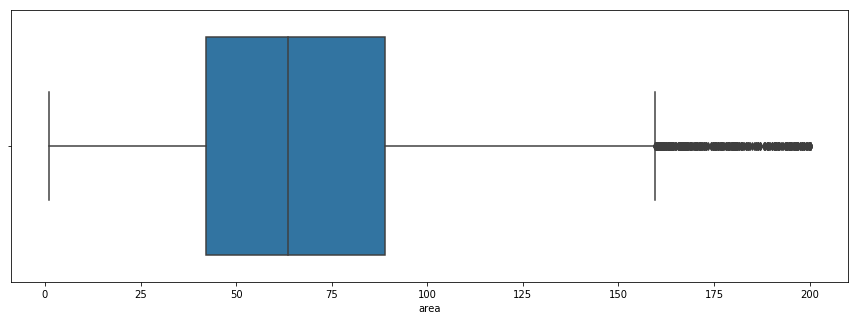

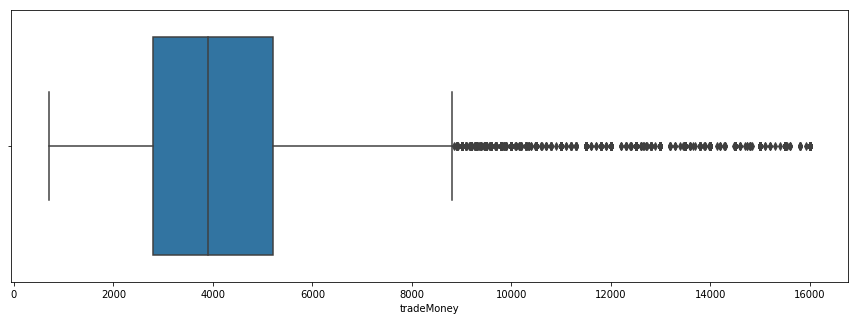

In [7]:
# 处理异常值后再次查看面积和租金分布图
plt.figure(figsize=(15,5))
sns.boxplot(data_train.area)
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(data_train.tradeMoney),
plt.show()

# 深度清洗

## 主要思路分析
针对每一个region的数据，对area和tradeMoney两个维度进行深度清洗。 
采用主观+数据可视化的方式。

In [10]:
def cleanData(data):
    data.drop(data[(data['region']=='RG00001') & (data['tradeMoney']<1000)&(data['area']>50)].index,inplace=True)
    data.drop(data[(data['region']=='RG00001') & (data['tradeMoney']>25000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00001') & (data['area']>250)&(data['tradeMoney']<20000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00001') & (data['area']>400)&(data['tradeMoney']>50000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00001') & (data['area']>100)&(data['tradeMoney']<2000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00002') & (data['area']<100)&(data['tradeMoney']>60000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['area']<300)&(data['tradeMoney']>30000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['tradeMoney']<500)&(data['area']<50)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['tradeMoney']<1500)&(data['area']>100)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['tradeMoney']<2000)&(data['area']>300)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['tradeMoney']>5000)&(data['area']<20)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['area']>600)&(data['tradeMoney']>40000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00004') & (data['tradeMoney']<1000)&(data['area']>80)].index,inplace=True)
    data.drop(data[(data['region']=='RG00006') & (data['tradeMoney']<200)].index,inplace=True)
    data.drop(data[(data['region']=='RG00005') & (data['tradeMoney']<2000)&(data['area']>180)].index,inplace=True)
    data.drop(data[(data['region']=='RG00005') & (data['tradeMoney']>50000)&(data['area']<200)].index,inplace=True)
    data.drop(data[(data['region']=='RG00006') & (data['area']>200)&(data['tradeMoney']<2000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00007') & (data['area']>100)&(data['tradeMoney']<2500)].index,inplace=True)
    data.drop(data[(data['region']=='RG00010') & (data['area']>200)&(data['tradeMoney']>25000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00010') & (data['area']>400)&(data['tradeMoney']<15000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00010') & (data['tradeMoney']<3000)&(data['area']>200)].index,inplace=True)
    data.drop(data[(data['region']=='RG00010') & (data['tradeMoney']>7000)&(data['area']<75)].index,inplace=True)
    data.drop(data[(data['region']=='RG00010') & (data['tradeMoney']>12500)&(data['area']<100)].index,inplace=True)
    data.drop(data[(data['region']=='RG00004') & (data['area']>400)&(data['tradeMoney']>20000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00008') & (data['tradeMoney']<2000)&(data['area']>80)].index,inplace=True)
    data.drop(data[(data['region']=='RG00009') & (data['tradeMoney']>40000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00009') & (data['area']>300)].index,inplace=True)
    data.drop(data[(data['region']=='RG00009') & (data['area']>100)&(data['tradeMoney']<2000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00011') & (data['tradeMoney']<10000)&(data['area']>390)].index,inplace=True)
    data.drop(data[(data['region']=='RG00012') & (data['area']>120)&(data['tradeMoney']<5000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00013') & (data['area']<100)&(data['tradeMoney']>40000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00013') & (data['area']>400)&(data['tradeMoney']>50000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00013') & (data['area']>80)&(data['tradeMoney']<2000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['area']>300)&(data['tradeMoney']>40000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['tradeMoney']<1300)&(data['area']>80)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['tradeMoney']<8000)&(data['area']>200)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['tradeMoney']<1000)&(data['area']>20)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['tradeMoney']>25000)&(data['area']>200)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['tradeMoney']<20000)&(data['area']>250)].index,inplace=True)
    data.drop(data[(data['region']=='RG00005') & (data['tradeMoney']>30000)&(data['area']<100)].index,inplace=True)
    data.drop(data[(data['region']=='RG00005') & (data['tradeMoney']<50000)&(data['area']>600)].index,inplace=True)
    data.drop(data[(data['region']=='RG00005') & (data['tradeMoney']>50000)&(data['area']>350)].index,inplace=True)
    data.drop(data[(data['region']=='RG00006') & (data['tradeMoney']>4000)&(data['area']<100)].index,inplace=True)
    data.drop(data[(data['region']=='RG00006') & (data['tradeMoney']<600)&(data['area']>100)].index,inplace=True)
    data.drop(data[(data['region']=='RG00006') & (data['area']>165)].index,inplace=True)
    data.drop(data[(data['region']=='RG00012') & (data['tradeMoney']<800)&(data['area']<30)].index,inplace=True)
    data.drop(data[(data['region']=='RG00007') & (data['tradeMoney']<1100)&(data['area']>50)].index,inplace=True)
    data.drop(data[(data['region']=='RG00004') & (data['tradeMoney']>8000)&(data['area']<80)].index,inplace=True)
    data.loc[(data['region']=='RG00002')&(data['area']>50)&(data['rentType']=='合租'),'rentType']='整租'
    data.loc[(data['region']=='RG00014')&(data['rentType']=='合租')&(data['area']>60),'rentType']='整租'
    data.drop(data[(data['region']=='RG00008')&(data['tradeMoney']>15000)&(data['area']<110)].index,inplace=True)
    data.drop(data[(data['region']=='RG00008')&(data['tradeMoney']>20000)&(data['area']>110)].index,inplace=True)
    data.drop(data[(data['region']=='RG00008')&(data['tradeMoney']<1500)&(data['area']<50)].index,inplace=True)
    data.drop(data[(data['region']=='RG00008')&(data['rentType']=='合租')&(data['area']>50)].index,inplace=True)
    data.drop(data[(data['region']=='RG00015') ].index,inplace=True)
    data.reset_index(drop=True, inplace=True)
    return data

data_train = cleanData(data_train)

TypeError: invalid type comparison